<a href="https://colab.research.google.com/github/lastirembender/Q-Learning/blob/main/FrozenLake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reinforcement Learning

Reinforcement Learning, deneme yanılma yoluyla çevre(environment) ile etkileşime girerek ve benzersiz geri bildirim olarak ödüller (olumlu veya olumsuz) alarak çevreden öğrenen aracılar oluşturarak kontrol görevlerini (karar sorunları olarak da adlandırılır) çözmek için bir framework'tür. 



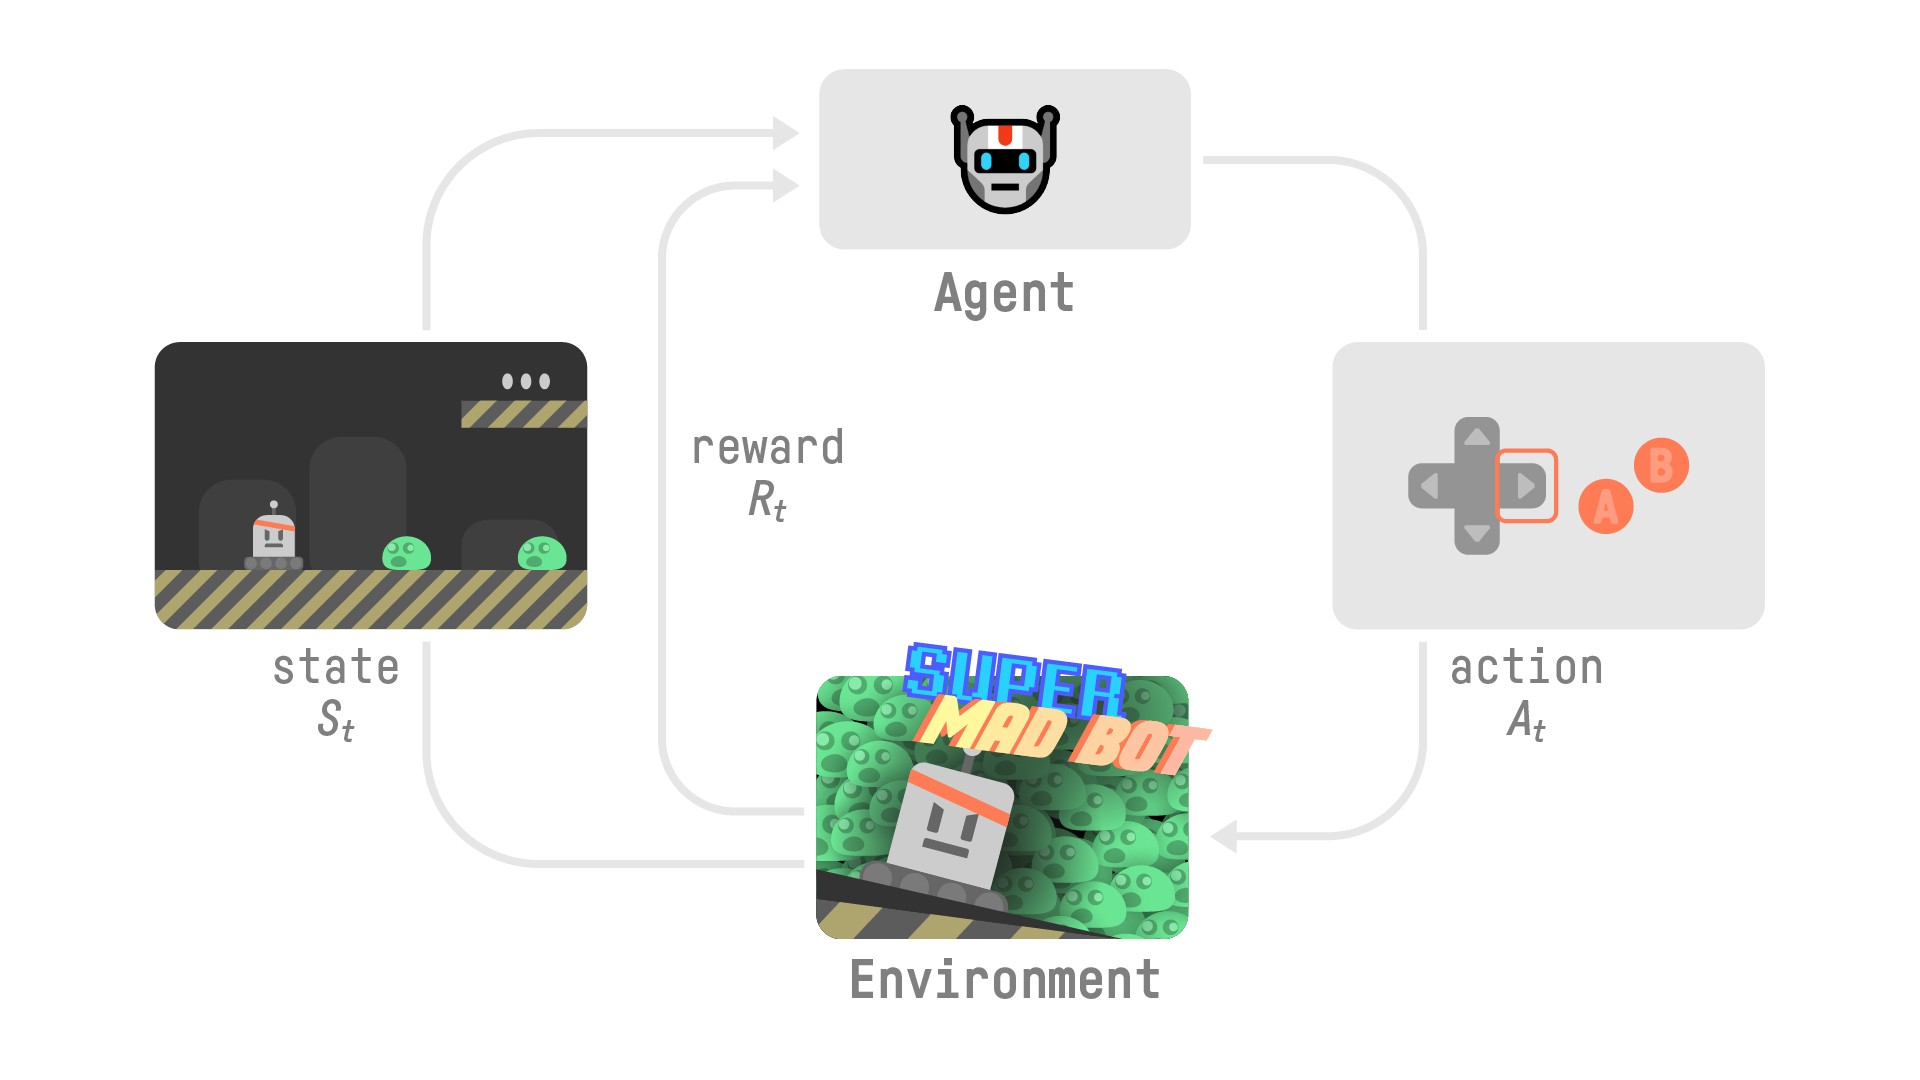

*  RL ödül hipotezine dayanmaktadır. Tüm amacın beklenen geri dönüşü maksimize etmek olduğu söylenilebilir.


*  Observations/States, ajanın çevreden(environment) aldığı bilgilerdir. Environment bağlama göre değişir. Bir oyun söz konusu olduğunda frame olabileceği gibi bir ticaret uygulaması için stok durumu olabilir.

*  Action Space : Ajanın edebileceği haraketlerin tamamıdır.  

* Reward : RL için en temel şeylerden biridir çünkü ajandan alınan tek geri dönüş ödüldür.  Ödül kümilatif ilerleyebilir.

---



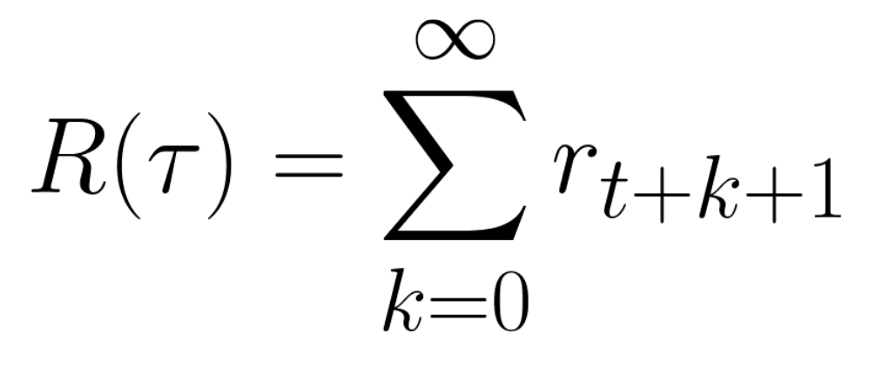

Bir oyunda kısa sürede ulaşılabilecek küçük ödüllerle, uzak mesafedeki ve riskli fazla ödüller arasında kalınabilir. Ulaşılmama olasılığı bulunduğu için uzak mesafedeki fazla ödüllere erişmek daha indirimlidir(discount). İndirim oranına(Discount rate) gamma denir. Gamma ne kadar büyükse kar o kadar azdır. Bu da ajanın uzak mesafedeki ödüllere eğilim gösterdiğini belirtir.




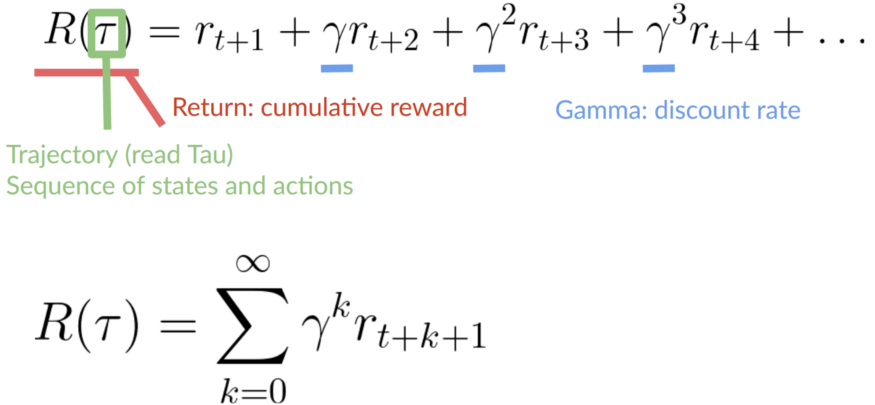

*  Exploration, çevre hakkında daha fazla bilgi edinmek için rastgele eylemler deneyerek çevreyi keşfetmektir. Bu uzaktaki fazla ödüllere ulaşılmasının önünü açar ancak bir o kadar da risklidir

*  Exploitation, ödülü en üst düzeye çıkarmak için bilinen bilgileri kullanmaktır. 

Ajan sadece exploit işlemi yaparsa sadece yakındaki ödül kaynaklarına odaklanır ve çok büyük miktardaki ödülleri kaçırabilir. Birazcık explore işlemi yaparsa büyük miktardaki ödülleri kazanabilir.

Bu Exploration/Exploitation ikilemini çözmek için Epsilon-Greedy Policy kullanılır.

* Policy π, Ajanın beynidir, bulunduğumuz durumda hangi eylemi yapmamız gerektiğini bize söyleyen işlevdir. Ajanın belirli zamandaki davranışını belirler.


* Policy'nin direkt kontrol edildiği, hangi durumlarda hangi davranışı göstermesi gerektiği bildirilen, yöntemler : policy-based methods


* Ajanın her durumda alacağı beklenen getiriyi bize bildiren bir değer işlevi eğiterek ve bu işlevi policy'i tanımlamak için kullanılan yöntemler: value-based methods 

Q Learning value-based yöntemlerden biridir.

En etkili algoritmayı bulmak için bu formül kullanılır:
 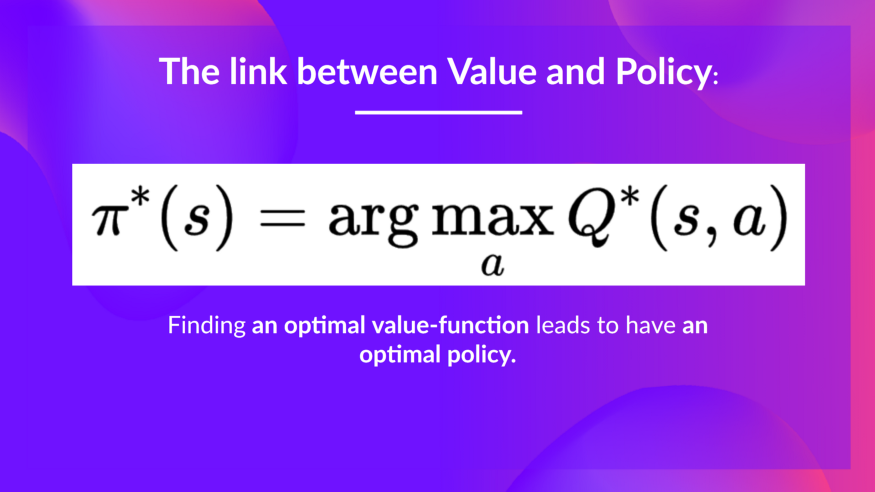

## **Q Learning**

Q Learning action-value fonksiyonu eğitmek için yaklaşımı kullanan off-policy value-based bir yöntemdir. 

(Off-policy: using a different policy for acting and updating.)

Q-fonksiyonu, her hücrenin bir durum-eylem değeri çifti değerine karşılık geldiği bir tablo olan bir Q-tablosuna sahiptir.

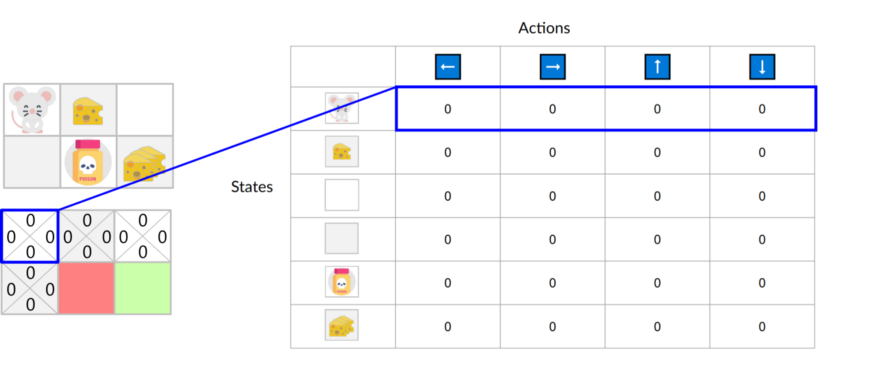

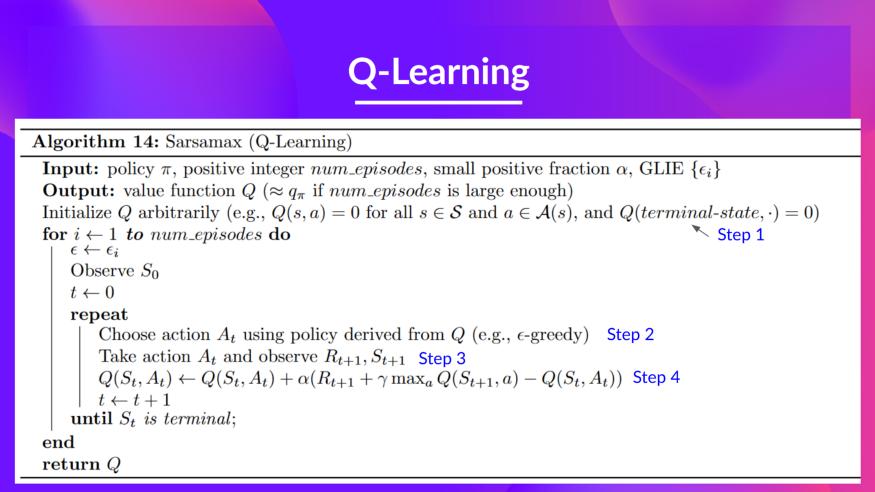

## Import Libraries

In [ ]:
import numpy as np
import gym
import random

## Creating the Enviroment

Frozen Lake OpenAI Gym tarafından oluşturulmuş bir oyun alanıdır. Bu oyun alanın senaryosu buz tutmuş 4x4'lük bir alanda geçmektedir. Oyundaki amaç suya düşmeden hedef noktadaki frizbiye bulaşmaktır.  



*   S: starting point, başlangıç noktası (güvenli alan)
*   F: frozen surface, donmuş yüzey (güvenli alan)
*   H: hole, suya düşmenize sebep olan nokta
*   G: goal, frizbinin olduğu hedef nokta

Daha fazla bilgi için:

https://gym.openai.com/envs/FrozenLake-v0/


In [ ]:
env = gym.make("FrozenLake-v0")
env.render()


SFFF
FHFH
FFFH
HFFG


##Create the Q-table and Initialize It

Satırların durum(state), sütunların olay(action) belirttiği bir Q-table oluşturmamız gerek.

In [ ]:
# Bunun için öncelikle oluşturduğumuz oyun alanının olası kaç olay ve durum 
# içerdiğini öğrenmemiz gerekli.

In [ ]:
state_space = env.observation_space.n
print("There are ", state_space, " possible states")
action_space = env.action_space.n
print("There are ", action_space, " possible actions")

There are  16  possible states
There are  4  possible actions


In [ ]:
# 16x24 boyutunda 0'lardan oluşan bir Q table oluşturulur
Q = np.zeros((16,4))
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Define the Hyperparameters

In [ ]:
total_episodes = 15000                # Toplam eğitim bölümü sayısı
total_test_episodes = 50              # Toplam test bölümü sayısı
max_steps = 99                       # Herbir bölümdeki adım sayısı

learning_rate = 0.8                   # Learning gate
gamma = 0.95                          # Discount rate

#Exploration parametreleri
epsilon = 1.0                         # Exploration oranı
max_epsilon = 1.0                     # Başlangıçtaki exploration olasılığı
min_epsilon = 0.01                    # Minimum exploration oranı
decay_rate = 0.005                    # Exploration olasılığı için üstel bozunma oranı

## Define the Epsilon-Greedy Policy 

In [ ]:
def epsilon_greedy_policy(Q, state):
  # Eğer random sayı epsilondan büyükse --> exploitation
  if (random.uniform(0,1) > epsilon):
    action = np.argmax(Q[state])
  # Aksi halde --> exploration
  else:
    action = env.action_space.sample()

  return action

## Define the Q-Learning Algorithm and Train

In [ ]:
for episode in range(total_episodes):     # Her bölüm için
  state = env.reset()                     # Oyun alanı ilk haline döndürülür
  step = 0                                # Adım sayısı sıfırlanır
  done = False                            # Oyunun bitip bitmemesi durumu sıfırlanır
  total_rewards = 0
 
  for step in range(max_steps):            
    # Maksimum adım sayısına gelene kadar 
    # O anki durum ve Q tablosu için epsilon_greedy_policy fonksiyonu çalıştırılır
    action = epsilon_greedy_policy(Q, state)         
    
    # Yeni durum, ödül, oyunun bitip bitmeme durumu ve bilgi değerleri alınır
    new_state, reward, done, info = env.step(action)

    # Alınan değerler Q learning formulünde yerine konulur
    Q[state][action] = Q[state][action] + learning_rate * (reward + gamma * np.max(Q[new_state]) - Q[state][action])
    
    # Bu adımda oluşan durum sonraki adımın durumu olur                                
    state = new_state

    # Eğer oyun bittiyse
    if done == True:
      break
  # Epsilon azaltılır çünkü exploration git gide azalmalıdır.
  epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)   


## Running All Code

In [ ]:
import time
rewards = []                

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(Q[state,:])
        
        new_state, reward, done, info = env.step(action)
        total_rewards += reward
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            rewards.append(total_rewards)
            break
        state = new_state
env.close()
print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(Q) 

Görüntülenen çıkış son 5000 satıra kısaltıldı.
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
****************************************************
EPISODE  27

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFF